<a href="https://colab.research.google.com/github/thesuper147/Carbon-Emissions_CS_DSRP/blob/main/Carbon_Emissions_CS_DSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Question: For a consumer, what purchasing habits have the largest impact on their carbon footprint?

In [70]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/SupplyChainEmissions.csv')

df = df.drop(columns=['2017 NAICS Code', 'Reference USEEIO Code'])


df.rename(columns={
    '2017 NAICS Title': 'Industry',
    'Supply Chain Emission Factors without Margins': 'Emissions_No_Margins',
    'Margins of Supply Chain Emission Factors': 'Margins',
    'Supply Chain Emission Factors with Margins': 'Total_Emissions'
}, inplace=True)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Industry              1016 non-null   object 
 1   GHG                   1016 non-null   object 
 2   Unit                  1016 non-null   object 
 3   Emissions_No_Margins  1016 non-null   float64
 4   Margins               1016 non-null   float64
 5   Total_Emissions       1016 non-null   float64
dtypes: float64(3), object(3)
memory usage: 47.8+ KB


Basic viewing of industry emission scale

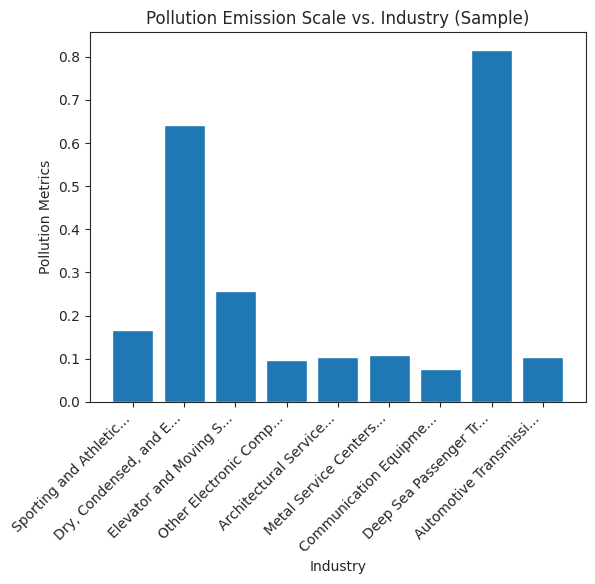

In [76]:
import matplotlib.pyplot as plt



sample_df = df.sample(9)
x_category = sample_df['Industry']
y_value = sample_df['Total_Emissions']

# had to cut off the text because it would become unviewable
plt.bar(
    [label[:21] + '...' if len(label) > 21 else label for label in x_category],
    y_value,
    label="Pollution Emission Scale vs. Industry"
)
plt.xlabel("Industry")
plt.ylabel("Pollution Metrics")
plt.title("Pollution Emission Scale vs. Industry (Sample)")
plt.xticks(rotation=45, ha="right")
plt.show()

Finding the total amount of industries polluting at certain amounts

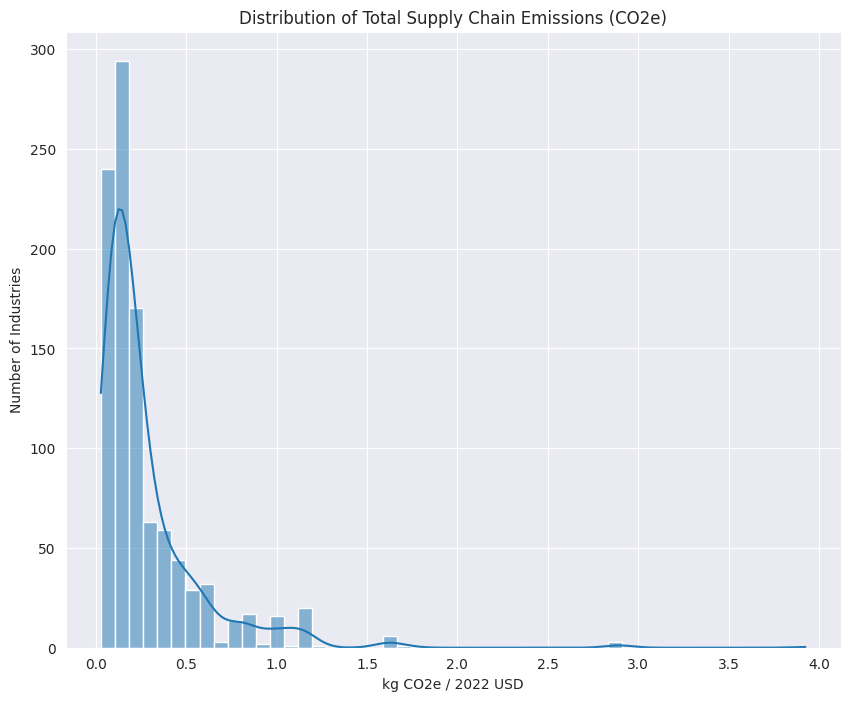

In [72]:

import seaborn as sns


sns.set_style('darkgrid')


plt.figure(figsize=(10, 8))
sns.histplot(df['Total_Emissions'], bins=50, kde=True)
plt.title('Distribution of Total Supply Chain Emissions (CO2e)')
plt.xlabel('kg CO2e / 2022 USD')
plt.ylabel('Number of Industries')
plt.show()


Mapping data to fit research question through categories

In [88]:
import numpy as np

df_consumer = df.copy()


df_consumer['Consumer Category'] = 'Other'

# filtering of industries (2017 naics title) to create specific categories that are usable for project
keywords_map = {
    'Housing & Utilities': ['Power generation', 'Electric', 'Electricity', 'Residential', 'Construction', 'Natural gas', 'Water', 'Sewer', 'Furniture', 'Appliance', 'Plumbing', 'Gas'],
    'Food & Beverages': ['Farm', 'Food', 'Beverage', 'Alcohol', 'Snack', 'Fish', 'Fishing', 'Breakfast', 'Cereal', 'Sugar', 'Winery', 'Brewery', 'Restaurant', 'Grocery', 'Restaurant', 'Tortilla', 'Corn', 'Farming', 'Dining', 'Flour', 'Pasta', 'Bakery', 'Bakeries', 'Convenience'],
    'Transportation': ['Automobile', 'Vehicle', 'Gasoline', 'Air transport', 'Rail', 'Transit', 'Taxi', 'Airplane', 'Car', 'Train', 'Bus', 'Transport'],
    'Apparel & Footwear': ['Apparel', 'Textile', 'Clothing', 'Fabric', 'Leather', 'Footwear', 'Fashion', 'Designer', 'Jewelry'],
    'Healthcare': ['Hospital', 'Ambulatory', 'Health', 'Pharmaceutical', 'Medical', 'Surgical', 'Surgery', 'Psychology', 'Doctor', 'Pharmacy', 'Veterinary', 'Vet', 'Safety', 'Ambulance', 'Clinic', 'Medicine'],
    'Entertainment & Recreation': ['Hotel', 'Amusement', 'Recreation', 'Museum', 'Arts', 'Spectator sports', 'Book', 'Motion picture', 'Movie', 'TV', 'Gambling', 'Casino', 'Game', 'Sports', 'Gaming', 'Theatre'],
    'Financial & Professional Services': ['Securities', 'Insurance', 'Credit', 'Monetary', 'Legal', 'Accounting', 'Bank','Financing', 'Claims', 'Loan', 'Brokers', 'Trust', 'Court', 'Financial'],
    'Manufacturing and Developmnent Industries': ['Manufacturing', 'Engineering', 'Corperate', 'Production', 'Extraction', 'Fuel', 'Development', 'Research', 'Refining']
}


for category, keywords in keywords_map.items():
    pattern = r'\b(' + '|'.join(keywords) + r')\b'
    mask = df_consumer['Industry'].str.contains(pattern, case=False)
    df_consumer.loc[mask, 'Consumer Category'] = category


# --> samples data for proofing and checking
print("number of industries assigned to each category:")
print(df_consumer['Consumer Category'].value_counts())

print("\nsample of mapped industries:")
print(df_consumer[['Industry', 'Consumer Category']].sample(10))

number of industries assigned to each category:
Consumer Category
Other                                        474
Manufacturing and Developmnent Industries    314
Food & Beverages                              58
Housing & Utilities                           35
Financial & Professional Services             35
Transportation                                30
Apparel & Footwear                            26
Entertainment & Recreation                    23
Healthcare                                    21
Name: count, dtype: int64

sample of mapped industries:
                                              Industry  \
295                         Mineral Wool Manufacturing   
754   Lessors of Miniwarehouses and Self-Storage Units   
140  Confectionery Manufacturing from Purchased Cho...   
1                     Oilseed (except Soybean) Farming   
557                                    New Car Dealers   
109  Structural Steel and Precast Concrete Contractors   
978  Computer and Office Machin

/tmp/ipython-input-88-4180167921.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df_consumer['Industry'].str.contains(pattern, case=False)
/tmp/ipython-input-88-4180167921.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df_consumer['Industry'].str.contains(pattern, case=False)
/tmp/ipython-input-88-4180167921.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df_consumer['Industry'].str.contains(pattern, case=False)
/tmp/ipython-input-88-4180167921.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df_consumer['Industry'].str.contains(pattern, case=False)
/tmp/ipython-input-88-4180167921.py:23: 

Creating a prototype bar plot to display carbon footprint in each created category

\ghg emissions by consumer spending category:
Consumer Category
Food & Beverages                             0.589375
Manufacturing and Developmnent Industries    0.341732
Housing & Utilities                          0.282571
Transportation                               0.263500
Other                                        0.240218
Apparel & Footwear                           0.238846
Entertainment & Recreation                   0.119348
Healthcare                                   0.116429
Financial & Professional Services            0.073143
Name: Total_Emissions, dtype: float64


/tmp/ipython-input-79-1189016756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_emissions.values, y=category_emissions.index, palette='crest')


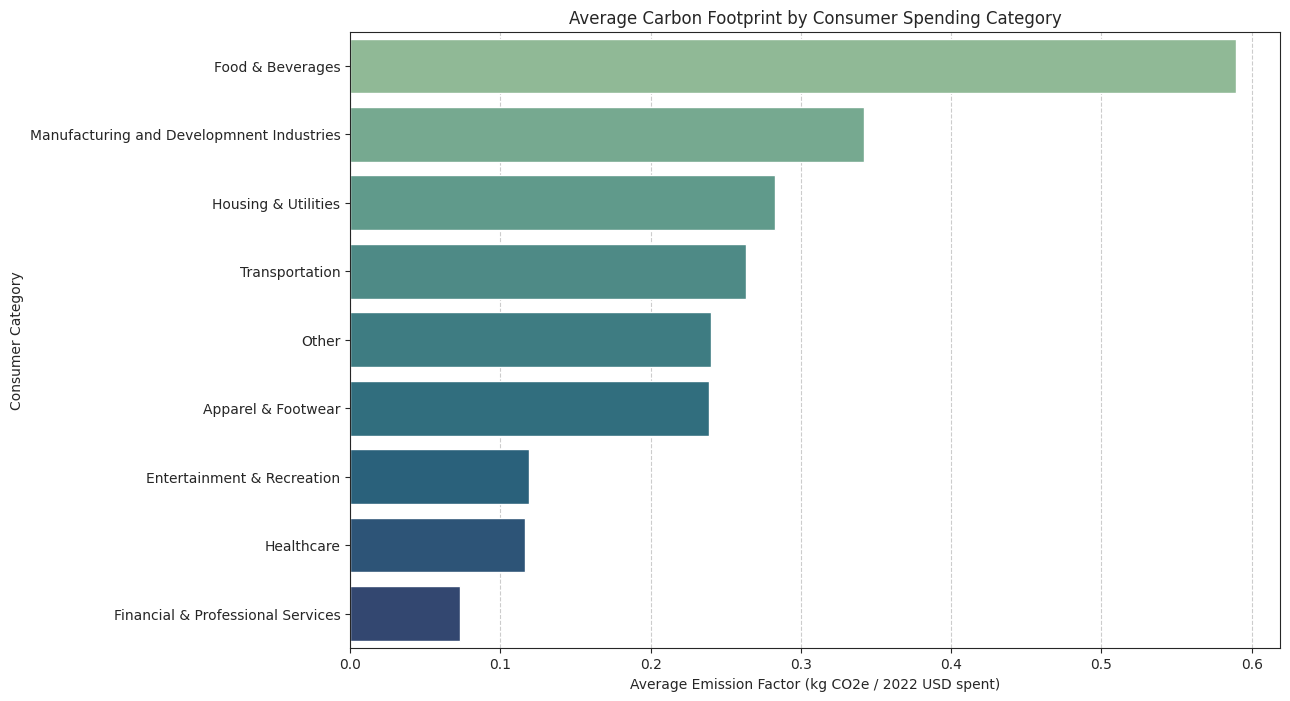

In [79]:
# average emission factor for each consumer categ
category_emissions = df_consumer.groupby('Consumer Category')['Total_Emissions'].mean().sort_values(ascending=False)

print("\ghg emissions by consumer spending category:")
print(category_emissions)


sns.set_style('ticks')
plt.figure(figsize=(12, 8))
sns.barplot(x=category_emissions.values, y=category_emissions.index, palette='crest')
plt.title('Average Carbon Footprint by Consumer Spending Category')
plt.xlabel('Average Emission Factor (kg CO2e / 2022 USD spent)')
plt.ylabel('Consumer Category')
plt.grid(axis='x', linestyle='--')
plt.show()